In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:55% !important; }</style>"))

In [ ]:
from tjmonopix.tjmonopix import TJMonoPix
chip = TJMonoPix()
chip.init()

In [ ]:
chip['VPCSWSF'].set_voltage(0.5, unit='V')
chip['VPC'].set_voltage(1.3, unit='V')
chip['BiasSF'].set_current(1000, unit='uA')

In [ ]:
chip['VDDP'].set_current_limit(60, unit='mA')
chip['VDDP'].set_voltage(1.8, unit='V')
chip['VDDA_DAC'].set_voltage(1.8, unit='V')
chip['VDDA'].set_voltage(1.8, unit='V')
chip['VDDD'].set_voltage(1.8, unit='V')

In [ ]:
chip['VDDA'].set_enable(True)

In [ ]:
chip['VDDA_DAC'].set_enable(True)

In [ ]:
chip['VDDP'].set_enable(True)

In [ ]:
chip['VDDD'].set_enable(True)

In [ ]:
chip.power_off()

In [ ]:
chip.power_on()

In [2]:
from tjmonopix.tjmonopix import TJMonoPix
from tjmonopix.analysis.plotting import plotting
import time

plot=plotting()
chip = TJMonoPix()
chip['CONF']['DEF_CONF_N'] = 0
chip['CONF']['AB_SELECT'] = 1
chip['CONF'].write()
chip.init()

chip['data_rx'].CONF_START_FREEZE = 64 #default 3
chip['data_rx'].CONF_STOP_FREEZE = 100 #default 40
chip['data_rx'].CONF_START_READ = 66 #default 6
chip['data_rx'].CONF_STOP_READ = 68 #default 7
chip['data_rx'].CONF_STOP = 105 #default 45

chip.power_on()

chip['CONF']['RESET_BCID'] = 1
chip['CONF']['RESET'] = 1
chip['CONF'].write()

chip['CONF']['EN_BX_CLK'] = 1
chip['CONF']['EN_OUT_CLK'] = 1
chip['CONF'].write()
 
chip['CONF']['RESET_BCID'] = 0
chip['CONF']['RESET'] = 0
chip['CONF'].write()

chip.default_conf()

#-------------------------------------------------#
chip.set_icasn_dacunits(0,0)
chip.set_vreset_dacunits(35,0)
chip.set_ireset_dacunits(2,1,0)
chip.set_ithr_dacunits(5,0)
chip.set_idb_dacunits(50,0)

chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_TEST_PATTERN'].setall(False)

chip['CONF_SR']['MASKD'].setall(False)
chip['CONF_SR']['MASKH'].setall(False)
chip['CONF_SR']['MASKV'].setall(False)

chip.write_conf()

chip['CONF']['DEF_CONF_N'] = 1
chip['CONF'].write()

2019-10-09 17:21:45,291 - [basil.HL.RegisterHardwareLayer] - ERROR   'NoneType' object has no attribute 'WriteExternal'
2019-10-09 17:21:45,319 - [basil.TL.SiUsb ] - INFO    Found USB board(s): USBpix with ID 207 (FW 15)
2019-10-09 17:21:45,323 - [basil.TL.SiUsb ] - INFO    FPGA already programmed, skipping download
2019-10-09 17:21:45,737 - [basil.HL.GPAC  ] - INFO    Found adapter card: General Purpose Analog Card with ID 1


4098
POWERING ON VDDP
POWERING ON VDDA_DAC
POWERING ON VDDA
POWERING ON VDDD


In [6]:
chip.get_power_status()

{'VDDA [V]': 1.7915640389221557,
 'VDDA [mA]': 62.43416855220045,
 'VDDA_DAC [V]': 1.7973164810756972,
 'VDDA_DAC [mA]': 3.53162464064632,
 'VDDD [V]': 1.799759839679359,
 'VDDD [mA]': -3.3934469967968035e-08,
 'VDDP [V]': 1.7937540430430434,
 'VDDP [mA]': 171.33471791232435}

In [279]:
chip['CONF_SR']['EN_PMOS_NOSF'].setall(False)
chip['CONF_SR']['EN_PMOS'].setall(False)
chip['CONF_SR']['EN_COMP'].setall(False)
chip['CONF_SR']['EN_HV'].setall(False)
chip['CONF_SR']['EN_OUT'].setall(False) #ENABLES OR DISABLES THE NORMAL OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['nEN_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY OUTPUT PADS, ACTIVE LOW
chip['CONF_SR']['EN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE NORMAL HITOR PADS, HITOR0-3 =  1-4 flavor, ACTIVE LOW
chip['CONF_SR']['nEN_HITOR_OUT'].setall(True) #ENABLES OR DISABLES THE COMPLEMENTARY HITOR PADS, ACTIVE LOW

chip['CONF_SR']['EN_PMOS'].setall(True)

chip['CONF_SR']['MASKD'].setall(True)
chip['CONF_SR']['MASKH'].setall(True)
chip['CONF_SR']['MASKV'].setall(True)

chip.mask(1,59,60)
chip.mask(1,98,133)
chip.mask(1,68,216)
chip.mask(1,15,72)
chip.mask(1,47,160)
chip.mask(1,51,18)
chip.mask(1,15,88)
chip.mask(1,68,47)
chip.mask(1,78,50)
chip.mask(1,89,106)
chip.mask(1,36,97)
chip.mask(1,46,84)
chip.mask(1,84,215)
chip.mask(1,88,110)
chip.mask(1,93,70)
chip.mask(1,106,205)
chip.mask(1,63,24)
chip.mask(1,101,96)
chip.mask(1,68,7)
chip.mask(1,109,159)
chip.mask(1,88,125)
chip.mask(1,89,115)
chip.mask(1,105,8)
chip.mask(1,1,189)
chip.mask(1,100,162)
chip.mask(1,100,153)
chip.mask(1,93,127)

# SELECT WHICH PHYSICAL COLUMS TO INJECT
# INJ_IN_MON_L AND INJ_IN_MON_L SELECT THE LEFT AND RIGHT SPECIAL ANALOG MONITORING PIXELS
chip['CONF_SR']['COL_PULSE_SEL'].setall(False)
#chip['CONF_SR']['COL_PULSE_SEL'][130]=True

chip['CONF_SR']['INJ_IN_MON_L'] = 0 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS LEFT SIDE
chip['CONF_SR']['INJ_IN_MON_R'] = 0 # ENABLE INJECTION FOR THE ANALOG MONITORING PIXELS RIGHT SIDE

# SELECT WHICH PHYSICAL ROWS TO INJECT
# THE SPEXIAL PIXELS OUTA_MON3 to OUTA_MON0 CORRESPONT TO ROWS 223 to 220 FOR INJECTION
chip['CONF_SR']['INJ_ROW'].setall(False)
#chip['CONF_SR']['INJ_ROW'][223:220] = False # FOR THE ANALOG MONITORING TOP PIXEL

# SELECT PHYSICAL COLUMNS AND ROWS FOR INJECTION WITH FUNCTION
#chip.enable_injection(1,18,99)

# SELECT PHYSICAL COLUMN(S) FOR HITOR OUTPUT
# nMASKH (SO SETTING MASKH TO FALSE) ENABLES HITOR FOR THE SPECIFIC ROW
chip['CONF_SR']['DIG_MON_SEL'].setall(False)
#chip.enable_column_hitor(1,18)

chip.write_conf()

In [37]:
## SET THE INJECTION PULSE AMPLITUDE
## 128-bit DAC (7-bit binary equivalent)
## SET THE VOLTAGES IN ONE HOT ENCODING, ONLY ONE BIT ACTIVE AT A TIME.
## V = (127/1.8)*#BIT
# The default values are VL=44, VH=79, VH-VL=35
# VDAC LSB=14.17mV, Cinj=230aF, 1.43e-/mV, ~710e-
chip.set_vl_dacunits(44,1)
chip.set_vh_dacunits(69,1)

####### CONFIGURE THE FRONT END ######

# SET VRESET_P, THIS IS THE BASELINE OF THE FRONT END INPUT, ONE HOT ENCODING
chip.set_vreset_dacunits(43,1) #1V

## 128-bit DAC (7-bit binary equivalent)
## SET THE CURRENTS USING THERMOMETER ENCODING, I = #BITS_ACTIVE*140nA*SCALING, SCALING IS DIFFERENT FOR EACH CURRENT
## SCALING: IBIAS=10, IDB=16, ITHR=0.125, ICASN=4, IRESET=0.03125
## ACTIVE BITS SHOULD BE SET STARTING FROM THE MIDDLE e.g. for 15 active bits, (128-15)/2=56,5 so 56zeros,15ones,57zeros
## Thus, Ix[71:57] = True

# SET ICASN, THIS CURRENT CONTROLS THE OUTPUT BASELINE, BE CAREFUL NOT TO SET IT TO HIGH
# ALWAYS MONITOR THE POWER AFTER SETTING ICASN. IF VDDD IS SEVERAL mA, REDUCE IT UNTIL IT RETURNS TO 0
# ICASN MAINLY CONTROLS THE THRESHOLD
chip.set_icasn_dacunits(0,1) #4.375nA # approx 1.084V at -3V backbias, 600mV at 0V backbias

# SET IRESET, THIS CURRENT CONTROLS THE RESET RATE OF THE FRONT END INPUT (ALSO THE THRESHOLD)
chip.set_ireset_dacunits(29,0,1) #270pA, HIGH LEAKAGE MODE, NORMAL SCALING, 0 = LOW LEAKAGE MODE, SCALING*0.01

# SET ITHR, THIS CURRENT CONTROLS THE RESET RATE OF THE OUTPUT (AND THE THRESHOLD)
chip.set_ithr_dacunits(10,1) #680pA

# SET ITHR, THIS CURRENT CONTROLS THE BIASING OF THE DISCRIMINATOR (AND THE THRESHOLD)
chip.set_idb_dacunits(28,1) #500nA

# SET IBIAS, THIS CURRENT IS THE DC CURRENT OF THE MAIN BRANCH OF THE FRONT END THAT PROVIDES AMPLIFICATION
# IT CONTROLS MAINLY THE RISE TIME
chip.set_ibias_dacunits(45,1) #500nA

############ ENABLE THE DAC CURRENT MONITORING ###########
# chip['CONF_SR']['SWCNTL_DACMONI'] = 0

########## SET THE BIAS CURRENTS OF THE TWO STAGE SOURCE FOLLOWER THAT BUFFERS THE ANALOG MONITORING VOLTAGES #########
# CONTROLS THE RESPONSE TIME AND THE LEVEL SHIFT OF THE BUFFER
# chip['CONF_SR']['SET_IBUFN_L'] = 0b1001
# chip['CONF_SR']['SET_IBUFP_L'] = 0b0101

chip.write_conf()

NameError: name 'chip' is not defined

In [344]:
#chip['data_rx'].set_en(True)

x = chip['fifo'].get_data()

ix = chip.interprete_data(x)
print(len(ix))
print(ix)

1644
[( 34,  99, 48, 48, 0) ( 34,  99, 27, 29, 0) ( 34,  99, 51, 52, 0) ...
 ( 26, 176,  3,  4, 0) ( 14, 117, 31, 32, 0) (110, 209, 47, 49, 0)]


vreset = 1.1644488189V
icasn = 4.375nA
ireset = 10.25390625pA, low leakage mode
ithr = 1.50390625nA
idb = 507.5nA
ibias = 503.125nA
[[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    2   73  739 1000 1000 1000 1000 1000 1000 1000 1000 1000
  1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]]


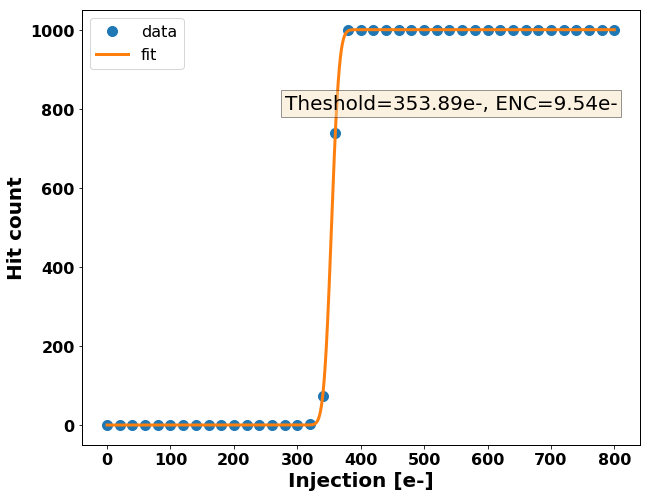

In [354]:
chip.set_vreset_dacunits(43,1)
chip.set_icasn_dacunits(0,1)
chip.set_ireset_dacunits(29,0,1)
chip.set_ithr_dacunits(10,1)
chip.set_idb_dacunits(28,1)
chip.set_ibias_dacunits(45,1)
chip.write_conf()

flavor=1
col=10
startrow=10
rownumber=1
ibias=45
VL=30
VHLrange=40
start_dif=0
repeat=1000
delay=1500
width=242
noise_en=0
analog_en=1
sleeptime=repeat*0.00005
DUtoe=20
#DUtoe=23
transparent=False

xhits = range(start_dif,VHLrange+start_dif+1)

hits = chip.inj_scan_row(flavor, col, startrow, rownumber, VL, VHLrange, start_dif, delay, width, repeat, noise_en, analog_en, sleeptime, ibias)
print hits
plot.plot_scurve(col, startrow, xhits, hits[0], repeat, VHLrange/2+start_dif, 0.5, 10.0, DUtoe, transparent)

In [23]:
import numpy as np
dat=np.array([[-6,6.194,-6,111.9],
  [-7,10.459,-6,110.32],
  [-8,200,-6,-200],
  [-6,8.128,-5,69.476],
  [-6,200,-3,-200],
  [-6,200,-4,153.9],
  [-5,8.192,-4,42.306],
  [-5,200,-3,172.8],
  [-3,5.793,-3,258],
  [-2,5.817,-2,130.9],
  [-2,200,-0,-200],
  [-1,18.46,-0,12.89],
  [-1,5.86,-1,5.35],
  #[-1,-200,-2,200],
  [-7.5,37.1,-6,80.0],
  [-7.7,78.72,-6,38.8],
  [-7.9,155.58,-6,37.685],
  ])
dat[:,1]

array([  6.194,  10.459, 200.   ,   8.128, 200.   , 200.   ,   8.192,
       200.   ,   5.793,   5.817, 200.   ,  18.46 ,   5.86 ,  37.1  ,
        78.72 , 155.58 ])

(-8.1, -0.9)

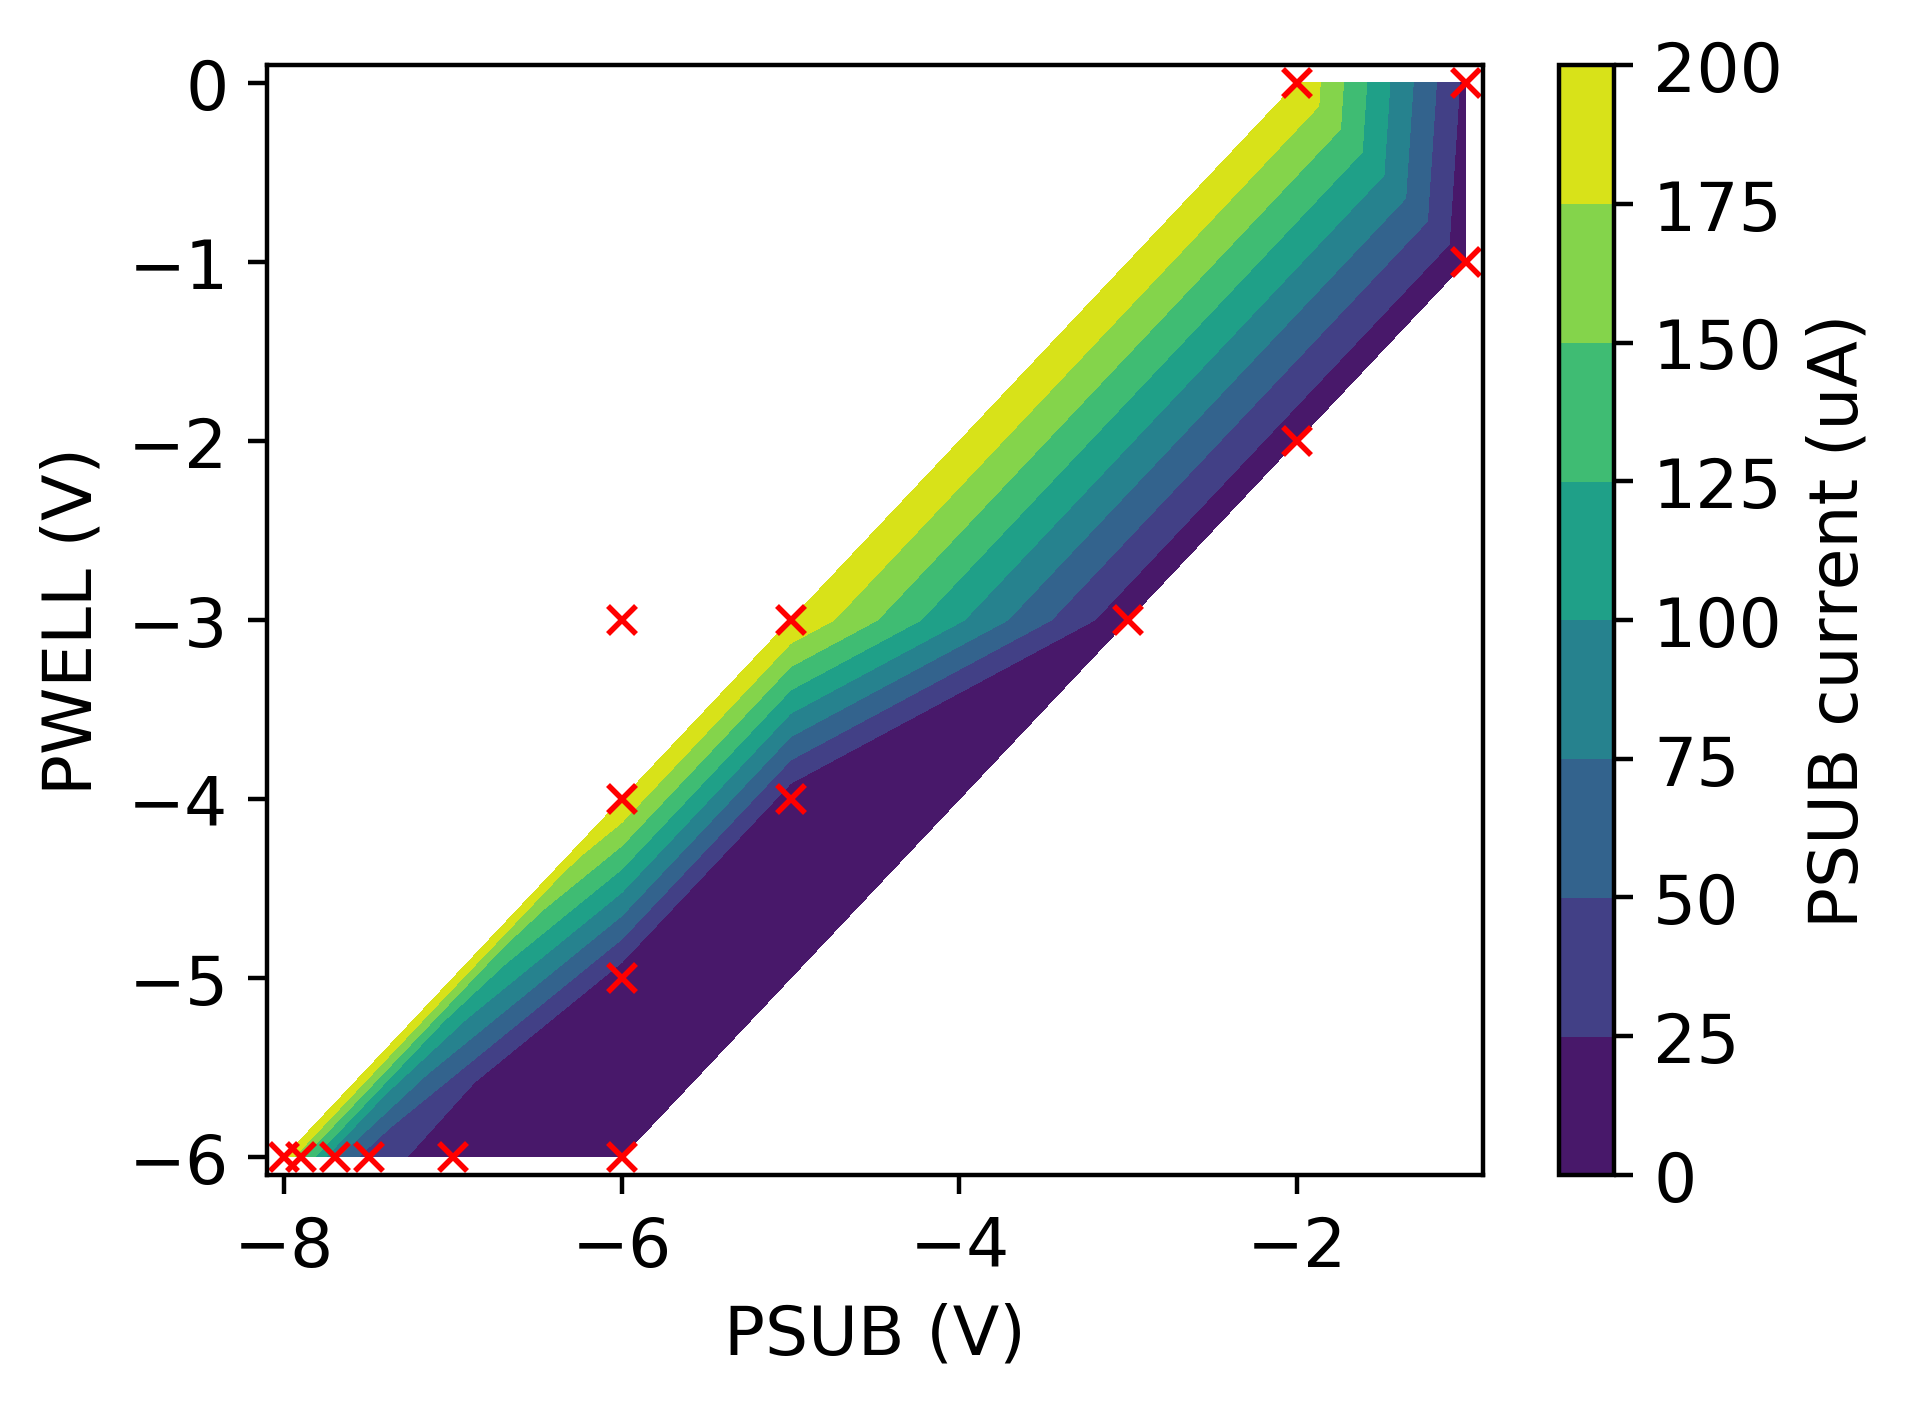

In [35]:
import sys
sys.path.append("/home/user/workspace/graphs/lib")
import ccpdTools
import matplotlib.pyplot as plt
ccpdTools.img_size(0.7,0.7)
plt.tricontourf(dat[:,0],dat[:,2],dat[:,1])
plt.plot(dat[:,0],dat[:,2],"rx",markersize=5)
plt.ylabel("PWELL (V)")
plt.xlabel("PSUB (V)")
cb=plt.colorbar()
cb.set_label("PSUB current (uA)")
plt.ylim(-6.1,0.1)
plt.xlim(-8.1,-0.9)